In [1]:
import subprocess, nibabel as nib, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib.colors
import sklearn
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import metrics
import os


In [2]:
cd /mnt/c/Users/xavie/Dropbox\ \(MIT\)/MIT/_ACTIVE_PROJECTS/Dong_SZgradients/clustering

/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Dong_SZgradients/clustering


In [3]:
## CEREBELLAR CORTEX - TO - CEREBELLAR CORTEX GRADIENT 1

# generate a cerebellar cortical mask from our eLife paper results
subprocess.check_output("fslmaths result_cerebellumonly_gradient1_nifti.nii -bin mask_positive.nii.gz", shell=True);
subprocess.check_output("fslmaths result_cerebellumonly_gradient1_nifti.nii -mul -1 -bin mask_negative.nii.gz", shell=True);
subprocess.check_output("fslmaths mask_negative.nii.gz -add mask_positive.nii.gz mask.nii.gz", shell=True);

# multiply files sent by Debo by 99999 so that they do not lose resolution when masking
subprocess.check_output("fslmaths all_mean_cerebellar_cerebral.nii -mul 99999 all_mean_cerebellar_cerebral_mul99999.nii.gz", shell=True);
subprocess.check_output("fslmaths all_mean_cerebellar_cerebellar.nii -mul 99999 all_mean_cerebellar_cerebellar_mul99999.nii.gz", shell=True);

# mask files based on this mask, using freesurfer's mri_mask
subprocess.check_output("mri_mask all_mean_cerebellar_cerebral_mul99999.nii.gz mask.nii.gz all_mean_cerebellar_cerebral_mul99999_masked.nii.gz", shell=True);
subprocess.check_output("mri_mask all_mean_cerebellar_cerebellar_mul99999.nii.gz mask.nii.gz all_mean_cerebellar_cerebellar_mul99999_masked.nii.gz", shell=True);

# divide by 99999 again to go back to original scale
subprocess.check_output("fslmaths all_mean_cerebellar_cerebral_mul99999_masked.nii.gz -div 99999 all_mean_cerebellar_cerebral_masked.nii.gz", shell=True);
subprocess.check_output("fslmaths all_mean_cerebellar_cerebellar_mul99999_masked.nii.gz -div 99999 all_mean_cerebellar_cerebellar_masked.nii.gz", shell=True);


In [16]:
cerebellar = nib.load('all_mean_cerebellar_cerebellar_masked.nii.gz').get_data()
cerebral = nib.load('all_mean_cerebellar_cerebral_masked.nii.gz').get_data()

cerebellar = np.ndarray.flatten(cerebellar)
cerebral = np.ndarray.flatten(cerebral)

In [17]:
cerebral.shape

(271633,)

processing:   2
processed:   2
processing:   3
processed:   3
processing:   4
processed:   4
processing:   5
processed:   5
processing:   6
processed:   6
processing:   7
processed:   7
processing:   8
processed:   8
processing:   9
processed:   9
processing:   10
processed:   10
processing:   11
processed:   11
processing:   12
processed:   12
processing:   13
processed:   13
processing:   14
processed:   14
processing:   15
processed:   15
processing:   16
processed:   16
processing:   17
processed:   17
processing:   18
processed:   18
processing:   19
processed:   19
processing:   20
processed:   20


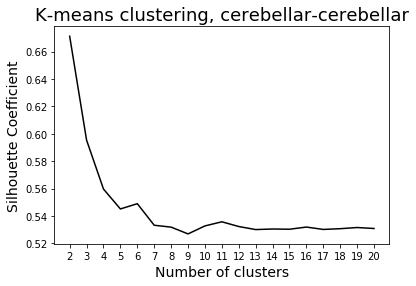

In [30]:
res = cerebellar[cerebellar!=0].copy()

listofnumbers = {}
for i in range(2,21):
    print('processing:   ' + str(i))
    cls = KMeans(n_clusters=i)
    data = res.T ### No normalization
    data = data.reshape(-1, 1) # needed because we are using a 1D array
    cls.fit(data)
    listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)
    print('processed:   ' + str(i))
    
### plot graph
plt.plot(list(listofnumbers.keys()),list(listofnumbers.values()), 'k-')
plt.ylabel('Silhouette Coefficient', fontsize=14)
plt.xlabel('Number of clusters', fontsize=14)
plt.locator_params(axis='x', tight=True, nbins=20)
plt.title('K-means clustering, cerebellar-cerebellar', fontsize=18)
plt.savefig(os.path.abspath('silhouette_CerebellarCerebellar.png'), format='png', dpi=600, transparent=False)
plt.show()

processing:   2
processed:   2
processing:   3
processed:   3
processing:   4
processed:   4
processing:   5
processed:   5
processing:   6
processed:   6
processing:   7
processed:   7
processing:   8
processed:   8
processing:   9
processed:   9
processing:   10
processed:   10
processing:   11
processed:   11
processing:   12
processed:   12
processing:   13
processed:   13
processing:   14
processed:   14
processing:   15
processed:   15
processing:   16
processed:   16
processing:   17
processed:   17
processing:   18
processed:   18
processing:   19
processed:   19
processing:   20
processed:   20


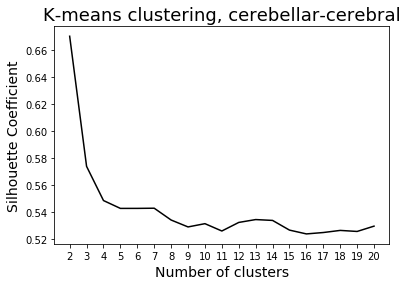

In [34]:
res = cerebral[cerebral!=0].copy()

listofnumbers = {}
for i in range(2,21):
    print('processing:   ' + str(i))
    cls = KMeans(n_clusters=i)
    data = res.T ### No normalization
    data = data.reshape(-1, 1) # needed because we are using a 1D array
    cls.fit(data)
    listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)
    print('processed:   ' + str(i))
    
### plot graph
plt.plot(list(listofnumbers.keys()),list(listofnumbers.values()), 'k-')
plt.ylabel('Silhouette Coefficient', fontsize=14)
plt.xlabel('Number of clusters', fontsize=14)
plt.locator_params(axis='x', tight=True, nbins=20)
plt.title('K-means clustering, cerebellar-cerebral', fontsize=18)
plt.savefig(os.path.abspath('silhouette_CerebellarCerebral.png'), format='png', dpi=600, transparent=False)
plt.show()

In [ ]:
# the analyses above determine that 2 is the optimal number of k-means clusters

In [6]:
cerebellar = nib.load('all_mean_cerebellar_cerebellar_masked.nii.gz').get_data()
cerebral = nib.load('all_mean_cerebellar_cerebral_masked.nii.gz').get_data()
cerebral_fromCerebral = nib.load('all_mean_cerebral_gradient.nii').get_data()

cerebellar = np.ndarray.flatten(cerebellar)
cerebral = np.ndarray.flatten(cerebral)
cerebral_fromCerebral = np.ndarray.flatten(cerebral_fromCerebral)

listofnumbers = {}

In [10]:
# threshold for the ten groups in cerebellar-cerebral
res = cerebral[cerebral!=0].copy()
i=10
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebral, 10 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebral, 10 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebral, 10 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebral, 10 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebral, 10 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))
print('Borders of sixth label for cerebral, 10 clusters:')
print(np.min(res[labels==5]))
print(np.max(res[labels==5]))
print('Borders of seventh label for cerebral, 10 clusters:')
print(np.min(res[labels==6]))
print(np.max(res[labels==6]))
print('Borders of eigth label for cerebral, 10 clusters:')
print(np.min(res[labels==7]))
print(np.max(res[labels==7]))
print('Borders of ninth label for cerebral, 10 clusters:')
print(np.min(res[labels==8]))
print(np.max(res[labels==8]))
print('Borders of tenth label for cerebral, 10 clusters:')
print(np.min(res[labels==9]))
print(np.max(res[labels==9]))

Borders of first label for cerebral, 10 clusters:
-0.5698757
-0.41449416
Borders of second label for cerebral, 10 clusters:
0.29356295
0.5121551
Borders of third label for cerebral, 10 clusters:
0.9516695
1.2700627
Borders of fourth label for cerebral, 10 clusters:
-0.10375104
0.07602076
Borders of fifth label for cerebral, 10 clusters:
0.72695726
0.9501095
Borders of sixth label for cerebral, 10 clusters:
0.077680774
0.29292294
Borders of seventh label for cerebral, 10 clusters:
-0.26252264
-0.10503105
Borders of eigth label for cerebral, 10 clusters:
0.5125051
0.72386724
Borders of ninth label for cerebral, 10 clusters:
-0.8115381
-0.5699157
Borders of tenth label for cerebral, 10 clusters:
-0.41413414
-0.26285264


In [14]:
# threshold for the ten groups in cerebellar-cerebellar
res = cerebellar[cerebellar!=0].copy()
i=10
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebellar, 10 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebellar, 10 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebellar, 10 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebellar, 10 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebellar, 10 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))
print('Borders of sixth label for cerebellar, 10 clusters:')
print(np.min(res[labels==5]))
print(np.max(res[labels==5]))
print('Borders of seventh label for cerebellar, 10 clusters:')
print(np.min(res[labels==6]))
print(np.max(res[labels==6]))
print('Borders of eigth label for cerebellar, 10 clusters:')
print(np.min(res[labels==7]))
print(np.max(res[labels==7]))
print('Borders of ninth label for cerebellar, 10 clusters:')
print(np.min(res[labels==8]))
print(np.max(res[labels==8]))
print('Borders of tenth label for cerebellar, 10 clusters:')
print(np.min(res[labels==9]))
print(np.max(res[labels==9]))

Borders of first label for cerebellar, 10 clusters:
0.10813108
0.33373335
Borders of second label for cerebellar, 10 clusters:
-0.401374
-0.25492254
Borders of third label for cerebellar, 10 clusters:
0.8089981
1.0306203
Borders of fourth label for cerebellar, 10 clusters:
-0.78791785
-0.54720545
Borders of fifth label for cerebellar, 10 clusters:
0.33548334
0.5722357
Borders of sixth label for cerebellar, 10 clusters:
-0.088180885
0.10717107
Borders of seventh label for cerebellar, 10 clusters:
1.0308003
1.3661537
Borders of eigth label for cerebellar, 10 clusters:
0.5760258
0.8084281
Borders of ninth label for cerebellar, 10 clusters:
-0.25452253
-0.0893309
Borders of tenth label for cerebellar, 10 clusters:
-0.5469155
-0.40179402


In [13]:
# threshold for the ten groups in cerebral-cerebellar
res = cerebral_fromCerebral[cerebral_fromCerebral!=0].copy()
i=10
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))
print('Borders of sixth label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==5]))
print(np.max(res[labels==5]))
print('Borders of seventh label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==6]))
print(np.max(res[labels==6]))
print('Borders of eigth label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==7]))
print(np.max(res[labels==7]))
print('Borders of ninth label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==8]))
print(np.max(res[labels==8]))
print('Borders of tenth label for cerebral (calculated in cerebral cortex), 10 clusters:')
print(np.min(res[labels==9]))
print(np.max(res[labels==9]))

Borders of first label for cerebral (calculated in cerebral cortex), 10 clusters:
-0.06991655
0.06534789
Borders of second label for cerebral (calculated in cerebral cortex), 10 clusters:
0.22152366
0.418514
Borders of third label for cerebral (calculated in cerebral cortex), 10 clusters:
-0.59264827
-0.4050831
Borders of fourth label for cerebral (calculated in cerebral cortex), 10 clusters:
0.64736325
0.918704
Borders of fifth label for cerebral (calculated in cerebral cortex), 10 clusters:
-0.40480444
-0.22660658
Borders of sixth label for cerebral (calculated in cerebral cortex), 10 clusters:
0.065398626
0.22142655
Borders of seventh label for cerebral (calculated in cerebral cortex), 10 clusters:
-0.9707393
-0.5928944
Borders of eigth label for cerebral (calculated in cerebral cortex), 10 clusters:
0.41863632
0.64704233
Borders of ninth label for cerebral (calculated in cerebral cortex), 10 clusters:
-0.2264424
-0.07001932
Borders of tenth label for cerebral (calculated in cerebra

In [15]:
# try with an arbitrary number of 15 clusters, cerebellar-cerebral
res = cerebral[cerebral!=0].copy()
i=15
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebral, 15 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebral, 15 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebral, 15 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebral, 15 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebral, 15 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))
print('Borders of sixth label for cerebral, 15 clusters:')
print(np.min(res[labels==5]))
print(np.max(res[labels==5]))
print('Borders of seventh label for cerebral, 15 clusters:')
print(np.min(res[labels==6]))
print(np.max(res[labels==6]))
print('Borders of eigth label for cerebral, 15 clusters:')
print(np.min(res[labels==7]))
print(np.max(res[labels==7]))
print('Borders of ninth label for cerebral, 15 clusters:')
print(np.min(res[labels==8]))
print(np.max(res[labels==8]))
print('Borders of tenth label for cerebral, 15 clusters:')
print(np.min(res[labels==9]))
print(np.max(res[labels==9]))
print('Borders of 11 label for cerebral, 15 clusters:')
print(np.min(res[labels==10]))
print(np.max(res[labels==10]))
print('Borders of 12 label for cerebral, 15 clusters:')
print(np.min(res[labels==11]))
print(np.max(res[labels==11]))
print('Borders of 13 label for cerebral, 15 clusters:')
print(np.min(res[labels==12]))
print(np.max(res[labels==12]))
print('Borders of 14 label for cerebral, 15 clusters:')
print(np.min(res[labels==13]))
print(np.max(res[labels==13]))
print('Borders of 15 label for cerebral, 15 clusters:')
print(np.min(res[labels==14]))
print(np.max(res[labels==14]))

Borders of first label for cerebral, 15 clusters:
1.0530906
1.2700627
Borders of second label for cerebral, 15 clusters:
-0.32644325
-0.22280222
Borders of third label for cerebral, 15 clusters:
0.2807428
0.42172423
Borders of fourth label for cerebral, 15 clusters:
-0.8115381
-0.6212462
Borders of fifth label for cerebral, 15 clusters:
0.56772566
0.7184272
Borders of sixth label for cerebral, 15 clusters:
-0.5115051
-0.4196242
Borders of seventh label for cerebral, 15 clusters:
-0.10811108
0.011780118
Borders of eigth label for cerebral, 15 clusters:
0.42346424
0.56597567
Borders of ninth label for cerebral, 15 clusters:
0.7214472
0.8811088
Borders of tenth label for cerebral, 15 clusters:
0.012350123
0.1389214
Borders of 11 label for cerebral, 15 clusters:
-0.41936418
-0.32704327
Borders of 12 label for cerebral, 15 clusters:
0.8819288
1.0513905
Borders of 13 label for cerebral, 15 clusters:
-0.6201862
-0.5123651
Borders of 14 label for cerebral, 15 clusters:
0.13929139
0.2785028
Bor

In [16]:
# try with an arbitrary number of 15 clusters, cerebellar-cerebellar
res = cerebellar[cerebellar!=0].copy()
i=15
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebellar, 15 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebellar, 15 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebellar, 15 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebellar, 15 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebellar, 15 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))
print('Borders of sixth label for cerebellar, 15 clusters:')
print(np.min(res[labels==5]))
print(np.max(res[labels==5]))
print('Borders of seventh label for cerebellar, 15 clusters:')
print(np.min(res[labels==6]))
print(np.max(res[labels==6]))
print('Borders of eigth label for cerebellar, 15 clusters:')
print(np.min(res[labels==7]))
print(np.max(res[labels==7]))
print('Borders of ninth label for cerebellar, 15 clusters:')
print(np.min(res[labels==8]))
print(np.max(res[labels==8]))
print('Borders of tenth label for cerebellar, 15 clusters:')
print(np.min(res[labels==9]))
print(np.max(res[labels==9]))
print('Borders of 11 label for cerebellar, 15 clusters:')
print(np.min(res[labels==10]))
print(np.max(res[labels==10]))
print('Borders of 12 label for cerebellar, 15 clusters:')
print(np.min(res[labels==11]))
print(np.max(res[labels==11]))
print('Borders of 13 label for cerebellar, 15 clusters:')
print(np.min(res[labels==12]))
print(np.max(res[labels==12]))
print('Borders of 14 label for cerebellar, 15 clusters:')
print(np.min(res[labels==13]))
print(np.max(res[labels==13]))
print('Borders of 15 label for cerebellar, 15 clusters:')
print(np.min(res[labels==14]))
print(np.max(res[labels==14]))

Borders of first label for cerebellar, 15 clusters:
0.35288352
0.5090351
Borders of second label for cerebellar, 15 clusters:
-0.40298402
-0.29874298
Borders of third label for cerebellar, 15 clusters:
0.99364996
1.1415814
Borders of fourth label for cerebellar, 15 clusters:
-0.07774078
0.053190533
Borders of fifth label for cerebellar, 15 clusters:
-0.78791785
-0.61205614
Borders of sixth label for cerebellar, 15 clusters:
0.6711467
0.83344835
Borders of seventh label for cerebellar, 15 clusters:
-0.298133
-0.19315194
Borders of eigth label for cerebellar, 15 clusters:
-0.50608504
-0.40319404
Borders of ninth label for cerebellar, 15 clusters:
0.05414054
0.19866198
Borders of tenth label for cerebellar, 15 clusters:
-0.19248192
-0.078550786
Borders of 11 label for cerebellar, 15 clusters:
0.8349183
0.9905299
Borders of 12 label for cerebellar, 15 clusters:
0.5097751
0.66906667
Borders of 13 label for cerebellar, 15 clusters:
0.20135202
0.3501935
Borders of 14 label for cerebellar, 15 

In [17]:
# threshold for the ten groups in cerebral-cerebellar
res = cerebral_fromCerebral[cerebral_fromCerebral!=0].copy()
i=15
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))
print('Borders of sixth label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==5]))
print(np.max(res[labels==5]))
print('Borders of seventh label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==6]))
print(np.max(res[labels==6]))
print('Borders of eigth label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==7]))
print(np.max(res[labels==7]))
print('Borders of ninth label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==8]))
print(np.max(res[labels==8]))
print('Borders of tenth label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==9]))
print(np.max(res[labels==9]))
print('Borders of 11 label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==10]))
print(np.max(res[labels==10]))
print('Borders of 12 label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==11]))
print(np.max(res[labels==11]))
print('Borders of 13 label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==12]))
print(np.max(res[labels==12]))
print('Borders of 14 label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==13]))
print(np.max(res[labels==13]))
print('Borders of 15 label for cerebral (calculated in cerebral cortex), 15 clusters:')
print(np.min(res[labels==14]))
print(np.max(res[labels==14]))

Borders of first label for cerebral (calculated in cerebral cortex), 15 clusters:
-0.046365604
0.037962772
Borders of second label for cerebral (calculated in cerebral cortex), 15 clusters:
0.502438
0.6547324
Borders of third label for cerebral (calculated in cerebral cortex), 15 clusters:
-0.5303372
-0.40387246
Borders of fourth label for cerebral (calculated in cerebral cortex), 15 clusters:
0.82529914
1.0263712
Borders of fifth label for cerebral (calculated in cerebral cortex), 15 clusters:
0.1270694
0.2370599
Borders of sixth label for cerebral (calculated in cerebral cortex), 15 clusters:
-0.15233243
-0.04641157
Borders of seventh label for cerebral (calculated in cerebral cortex), 15 clusters:
-0.40372327
-0.2758584
Borders of eigth label for cerebral (calculated in cerebral cortex), 15 clusters:
-0.9707393
-0.67457616
Borders of ninth label for cerebral (calculated in cerebral cortex), 15 clusters:
0.36345267
0.5022196
Borders of tenth label for cerebral (calculated in cerebral

In [59]:
# using 5 clusters
res = cerebral[cerebral!=0].copy()
i=5
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebral, 5 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebral, 5 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebral, 5 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebral, 5 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebral, 5 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))


Borders of first label for cerebral, 5 clusters:
-0.38420385
-0.07217072
Borders of second label for cerebral, 5 clusters:
0.30979308
0.73549736
Borders of third label for cerebral, 5 clusters:
-0.8115381
-0.38435385
Borders of fourth label for cerebral, 5 clusters:
-0.07079071
0.30689308
Borders of fifth label for cerebral, 5 clusters:
0.7356474
1.2700627


In [60]:
# using 5 clusters
res = cerebellar[cerebellar!=0].copy()
i=5
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebellar, 5 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebellar, 5 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebellar, 5 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebellar, 5 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebellar, 5 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))

Borders of first label for cerebellar, 5 clusters:
-0.39213392
-0.08466084
Borders of second label for cerebellar, 5 clusters:
0.7593376
1.3661537
Borders of third label for cerebellar, 5 clusters:
0.3092831
0.75781757
Borders of fourth label for cerebellar, 5 clusters:
-0.78791785
-0.39224392
Borders of fifth label for cerebellar, 5 clusters:
-0.083310835
0.30726308


In [19]:
# threshold for 5 groups in cerebral-cerebellar
res = cerebral_fromCerebral[cerebral_fromCerebral!=0].copy()
i=5
cls = KMeans(n_clusters=i)
data = res.T ### No normalization
data = data.reshape(-1, 1) # needed because we are using a 1D array
cls.fit(data)
listofnumbers[i] = metrics.silhouette_score(data, cls.labels_, metric='euclidean', sample_size=None, random_state=None)

labels = cls.labels_

print('Borders of first label for cerebral (calculated in cerebral cortex), 5 clusters:')
print(np.min(res[labels==0]))
print(np.max(res[labels==0]))
print('Borders of second label for cerebral (calculated in cerebral cortex), 5 clusters:')
print(np.min(res[labels==1]))
print(np.max(res[labels==1]))
print('Borders of third label for cerebral (calculated in cerebral cortex), 5 clusters:')
print(np.min(res[labels==2]))
print(np.max(res[labels==2]))
print('Borders of fourth label for cerebral (calculated in cerebral cortex), 5 clusters:')
print(np.min(res[labels==3]))
print(np.max(res[labels==3]))
print('Borders of fifth label for cerebral (calculated in cerebral cortex), 5 clusters:')
print(np.min(res[labels==4]))
print(np.max(res[labels==4]))

Borders of first label for cerebral (calculated in cerebral cortex), 5 clusters:
-0.41619742
-0.13276646
Borders of second label for cerebral (calculated in cerebral cortex), 5 clusters:
0.18071425
0.60187376
Borders of third label for cerebral (calculated in cerebral cortex), 5 clusters:
0.60205233
1.3600912
Borders of fourth label for cerebral (calculated in cerebral cortex), 5 clusters:
-0.9707393
-0.4162613
Borders of fifth label for cerebral (calculated in cerebral cortex), 5 clusters:
-0.13266121
0.18065868
